# **Perkenalan**

Nama  : Azka Irsyad Choir <br>
Batch : HCK-024

**Objektif** <br>
- Mengembangkan model machine learning berbasis regresi linear untuk memprediksi konsumsi energi di industri baja.
- Meningkatkan efisiensi operasional dengan mengidentifikasi pola konsumsi energi yang optimal.
- Menggunakan data historis konsumsi energi untuk membantu pengambilan keputusan berbasis data.
- Mengurangi pemborosan energi dan emisi karbon melalui prediksi yang akurat.

**Latar Belakang Masalah** <br>
Industri baja memiliki tingkat konsumsi energi yang signifikan dan berkontribusi pada emisi karbon yang tinggi. Ketidakefisienan dalam pengelolaan energi dapat menyebabkan biaya operasional meningkat, yang berpengaruh terhadap profitabilitas perusahaan. Di era digital, pemanfaatan data historis konsumsi energi melalui teknologi machine learning dapat memberikan wawasan penting untuk mengoptimalkan penggunaan energi. Dengan membangun model prediksi berbasis data, perusahaan dapat merencanakan strategi yang lebih efisien dan berkelanjutan.

**Penjabaran Masalah** <br>
- Konsumsi energi dalam industri baja dipengaruhi oleh berbagai faktor seperti waktu, jenis beban, dan karakteristik teknis lainnya yang perlu dianalisis secara mendalam.
- Data historis energi perlu diolah dan dimodelkan agar dapat memberikan prediksi akurat untuk kebutuhan operasional.
- Tanpa model prediksi yang baik, sulit bagi perusahaan untuk mengidentifikasi pola konsumsi energi dan menentukan langkah optimasi yang diperlukan.
- Regresi linear sebagai algoritma yang sederhana namun efektif dapat menjadi solusi awal dalam membangun prediksi kebutuhan energi.


**SMART GOALS** <br>

- Specific: Membuat model prediksi konsumsi energi di industri baja menggunakan regresi linear.
- Measurable: Mencapai nilai R² > 0.85 atau Mean Squared Error (MSE) di bawah target tertentu.
- Achievable: Menggunakan dataset yang tersedia untuk membuat pipeline end-to-end, mulai dari preprocessing hingga model evaluasi.
- Relevant: Mendukung kebutuhan industri dalam mengoptimalkan penggunaan energi dan mengurangi emisi karbon.
- Time-bound: Proyek diselesaikan dalam waktu 4 minggu dengan laporan akhir dan model yang siap dideploy.

**Problem Statment** <br>

Bagaimana membangun model prediksi konsumsi energi yang efektif dan efisien di industri baja menggunakan algoritma regresi linear? Bagaimana model ini dapat memberikan kontribusi nyata dalam mengoptimalkan konsumsi energi dan mengurangi dampak lingkungan tanpa mengorbankan efisiensi produksi?

# **Import Libraries**

In [47]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
import joblib
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

# **Data Loading**

| Column | Description |
| --- | --- |
| date | Tanggal dan waktu pengukuran (format dd/mm/yyyy HH:MM). |
| Usage_kWh | Konsumsi energi dalam kWh. |
| Lagging_Current_Reactive.Power_kVarh | Energi reaktif tertinggal dalam kVarh.|
| Lagging_Current_Reactive.Power_kVarh | Energi reaktif tertinggal dalam kVarh.|
|Leading_Current_Reactive_Power_kVarh | Energi reaktif memimpin dalam kVarh.|
|CO2(tCO2) | Emisi karbon dioksida (dalam ton CO2).|
|Lagging_Current_Power_Factor | Faktor daya arus tertinggal (persentase).|
|Leading_Current_Power_Factor | Faktor daya arus memimpin (persentase).|
|NSM | Number of seconds from midnight (detik sejak tengah malam).|
|WeekStatus | Status hari, apakah hari kerja atau akhir pekan.|
|Day_of_week | Nama hari dalam seminggu.|
|Load_Type | Jenis beban (misalnya, Light_Load).|

In [3]:
df = pd.read_csv('Steel_industry_data.csv')
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [46]:
df.describe()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,2018-07-02 11:52:30,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-04-02 05:56:15,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,2018-07-02 11:52:30,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,2018-10-01 17:48:45,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,2018-12-31 23:45:00,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000
std,NaN,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317


In [4]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [5]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [7]:
df.isna().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


co2 = ppn
nsm = s
lagging = %

# **Exploratory Data Analysis (EDA)**

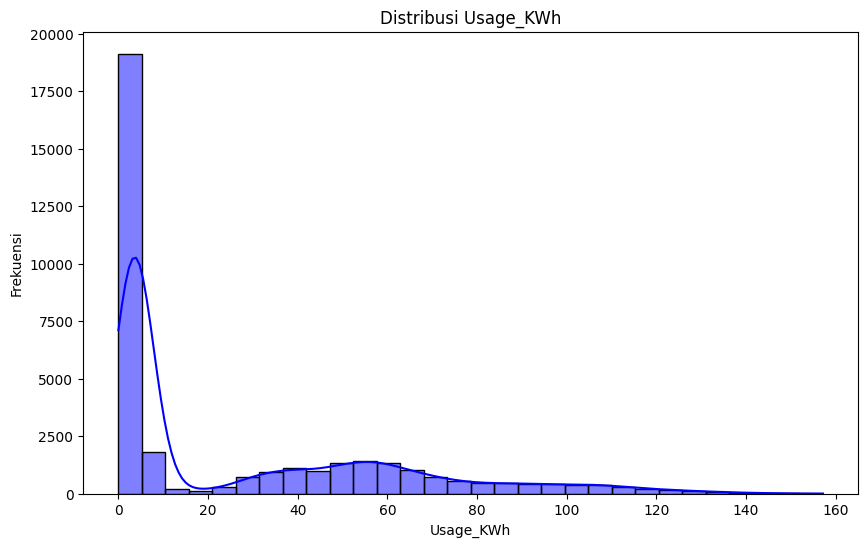

In [10]:
# Distribusi variabel target
plt.figure(figsize=(10, 6))
sns.histplot(df['Usage_kWh'], kde=True, bins=30, color='blue')
plt.title('Distribusi Usage_KWh')
plt.xlabel('Usage_KWh')
plt.ylabel('Frekuensi')
plt.show()

Berdasarkan distribusi penggunaan listrik, sebagian besar pengguna hanya mengonsumsi sedikit listrik. Hal ini menunjukkan bahwa banyak orang sudah cukup efisien dalam penggunaan energi. Namun, ada juga sedikit pengguna yang mengonsumsi listrik dalam jumlah besar. Untuk itu, kebijakan penghematan energi bisa difokuskan pada kelompok dengan penggunaan rendah, sementara bagi pengguna yang konsumsi listriknya tinggi, bisa diberikan perhatian khusus, misalnya dengan tarif lebih tinggi atau program efisiensi energi.

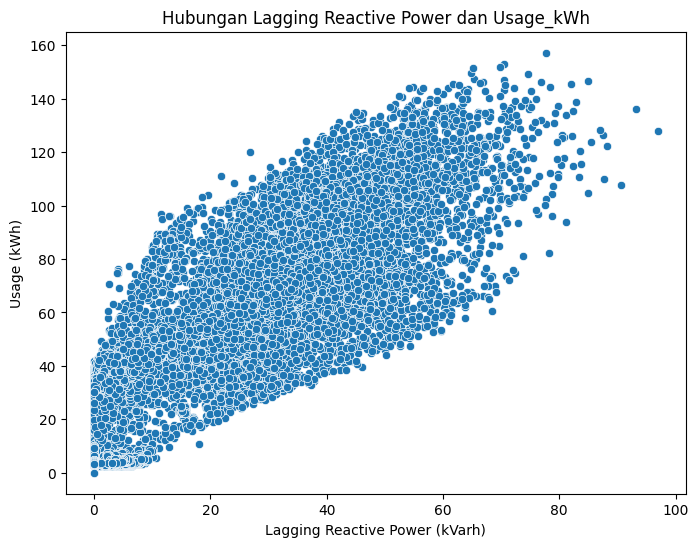

In [11]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Lagging_Current_Reactive.Power_kVarh'], y=df['Usage_kWh'])
plt.title('Hubungan Lagging Reactive Power dan Usage_kWh')
plt.xlabel('Lagging Reactive Power (kVarh)')
plt.ylabel('Usage (kWh)')
plt.show()


- Tren Positif: Tampaknya ada hubungan positif antara Lagging Reactive Power dengan Usage. Artinya, semakin tinggi nilai daya reaktif tertinggal (lagging reactive power), semakin besar penggunaan energi (usage). Ini bisa menunjukkan bahwa daya reaktif yang lebih tinggi berhubungan dengan penggunaan energi yang lebih besar.

- Sebaran Lebar: Meskipun ada hubungan positif, data tersebar cukup lebar, terutama pada nilai Lagging Reactive Power yang lebih tinggi. Hal ini menunjukkan bahwa meskipun ada tren umum, ada juga variasi yang besar dalam penggunaan energi untuk nilai daya reaktif tertinggal yang serupa.

Kesimpulan:

Ada hubungan positif antara Lagging Reactive Power dan Usage, meskipun sebaran data cukup luas.
Peningkatan daya reaktif tertinggal cenderung berasosiasi dengan peningkatan penggunaan energi, tetapi variasi yang besar dalam data menunjukkan kemungkinan adanya faktor-faktor lain yang mempengaruhi penggunaan energi.

Insight:

Untuk optimasi penggunaan energi, pengelolaan daya reaktif bisa menjadi faktor penting dalam mengurangi pemborosan energi.

C:\Users\JANGAN DI ENTER\AppData\Local\Temp\ipykernel_16860\1357124943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Load_Type', data=df, palette='viridis')


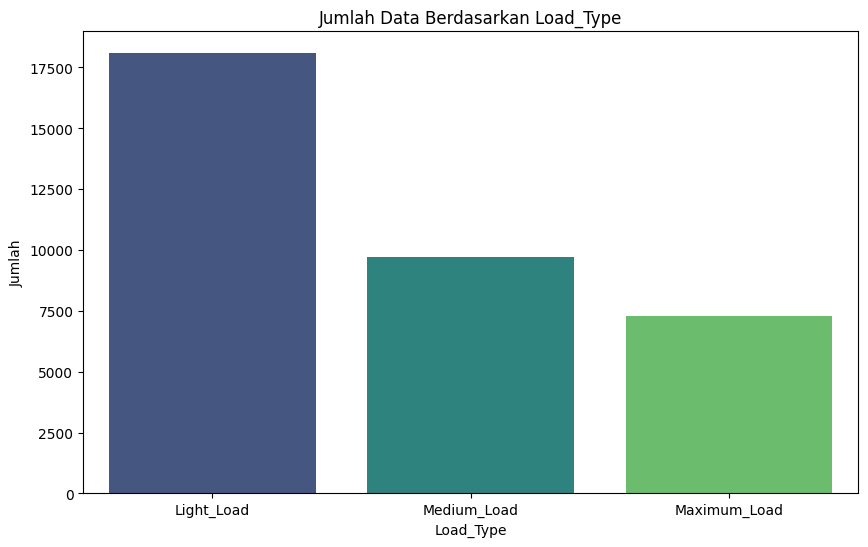

In [12]:
# Plot jumlah data untuk variabel kategorikal
plt.figure(figsize=(10, 6))
sns.countplot(x='Load_Type', data=df, palette='viridis')
plt.title('Jumlah Data Berdasarkan Load_Type')
plt.xlabel('Load_Type')
plt.ylabel('Jumlah')
plt.show()

Gambar tersebut menunjukkan jumlah data berdasarkan tiga jenis beban (Load_Type): Light_Load, Medium_Load, dan Maximum_Load. 

Dari grafik ini, dapat disimpulkan bahwa sebagian besar data berasal dari kategori Light_Load, dengan jumlah data yang jauh lebih tinggi dibandingkan kategori Medium_Load dan Maximum_Load. Medium_Load memiliki jumlah data yang cukup banyak, sementara Maximum_Load memiliki jumlah data yang paling sedikit.

Insight: 

Data ini menunjukkan bahwa mayoritas entitas atau pengguna memiliki beban yang ringan (Light_Load), dan hanya sedikit yang masuk dalam kategori beban lebih berat (Medium_Load dan Maximum_Load). Hal ini bisa menjadi indikator bahwa sebagian besar pengguna atau entitas dalam dataset tidak memerlukan konsumsi energi dalam jumlah besar, sementara hanya sedikit yang membutuhkan energi lebih banyak.

<Axes: title={'center': 'boxplot_usage_kwh'}, ylabel='Usage_kWh'>

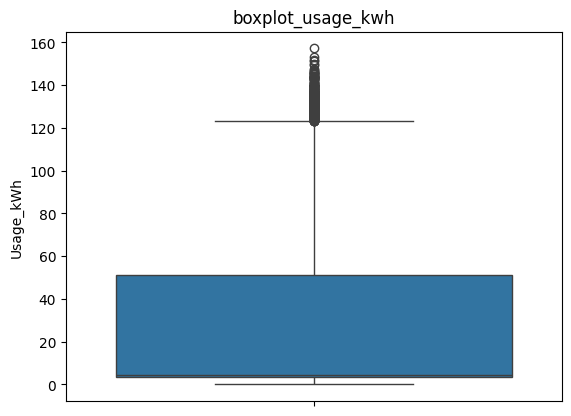

In [13]:
plt.title('boxplot_usage_kwh')
sns.boxplot(df['Usage_kWh'])

- Rentang Penggunaan:
Boxplot menunjukkan bahwa sebagian besar data penggunaan listrik berada di antara nilai sekitar 10 KWh hingga 50 KWh. Ini menunjukkan bahwa sebagian besar pengguna mengkonsumsi listrik dalam kisaran tersebut.

- Outliers :
Terdapat beberapa titik di atas nilai 120 KWh yang merupakan outliers, atau data yang jauh lebih tinggi dari rentang umum. Ini menunjukkan bahwa ada beberapa pengguna yang menggunakan listrik jauh lebih banyak dibandingkan yang lain.

- Median:
Median penggunaan listrik terletak di sekitar 30 KWh, yang berarti setengah dari pengguna mengkonsumsi lebih sedikit dari 30 KWh, dan setengah lainnya mengkonsumsi lebih banyak.
Insight: Data ini menunjukkan bahwa kebanyakan pengguna memiliki konsumsi listrik yang moderat, tetapi ada beberapa pengguna dengan konsumsi listrik yang jauh lebih tinggi. Hal ini bisa berarti bahwa ada perbedaan besar dalam pola konsumsi listrik, yang mungkin memerlukan perhatian khusus untuk pengguna dengan konsumsi yang sangat tinggi (outliers).

Insight: 

- Data ini menunjukkan bahwa kebanyakan pengguna memiliki konsumsi listrik yang moderat, tetapi ada beberapa pengguna dengan konsumsi listrik yang jauh lebih tinggi. Hal ini bisa berarti bahwa ada perbedaan besar dalam pola konsumsi listrik, yang mungkin memerlukan perhatian khusus untuk pengguna dengan konsumsi yang sangat tinggi (outliers).

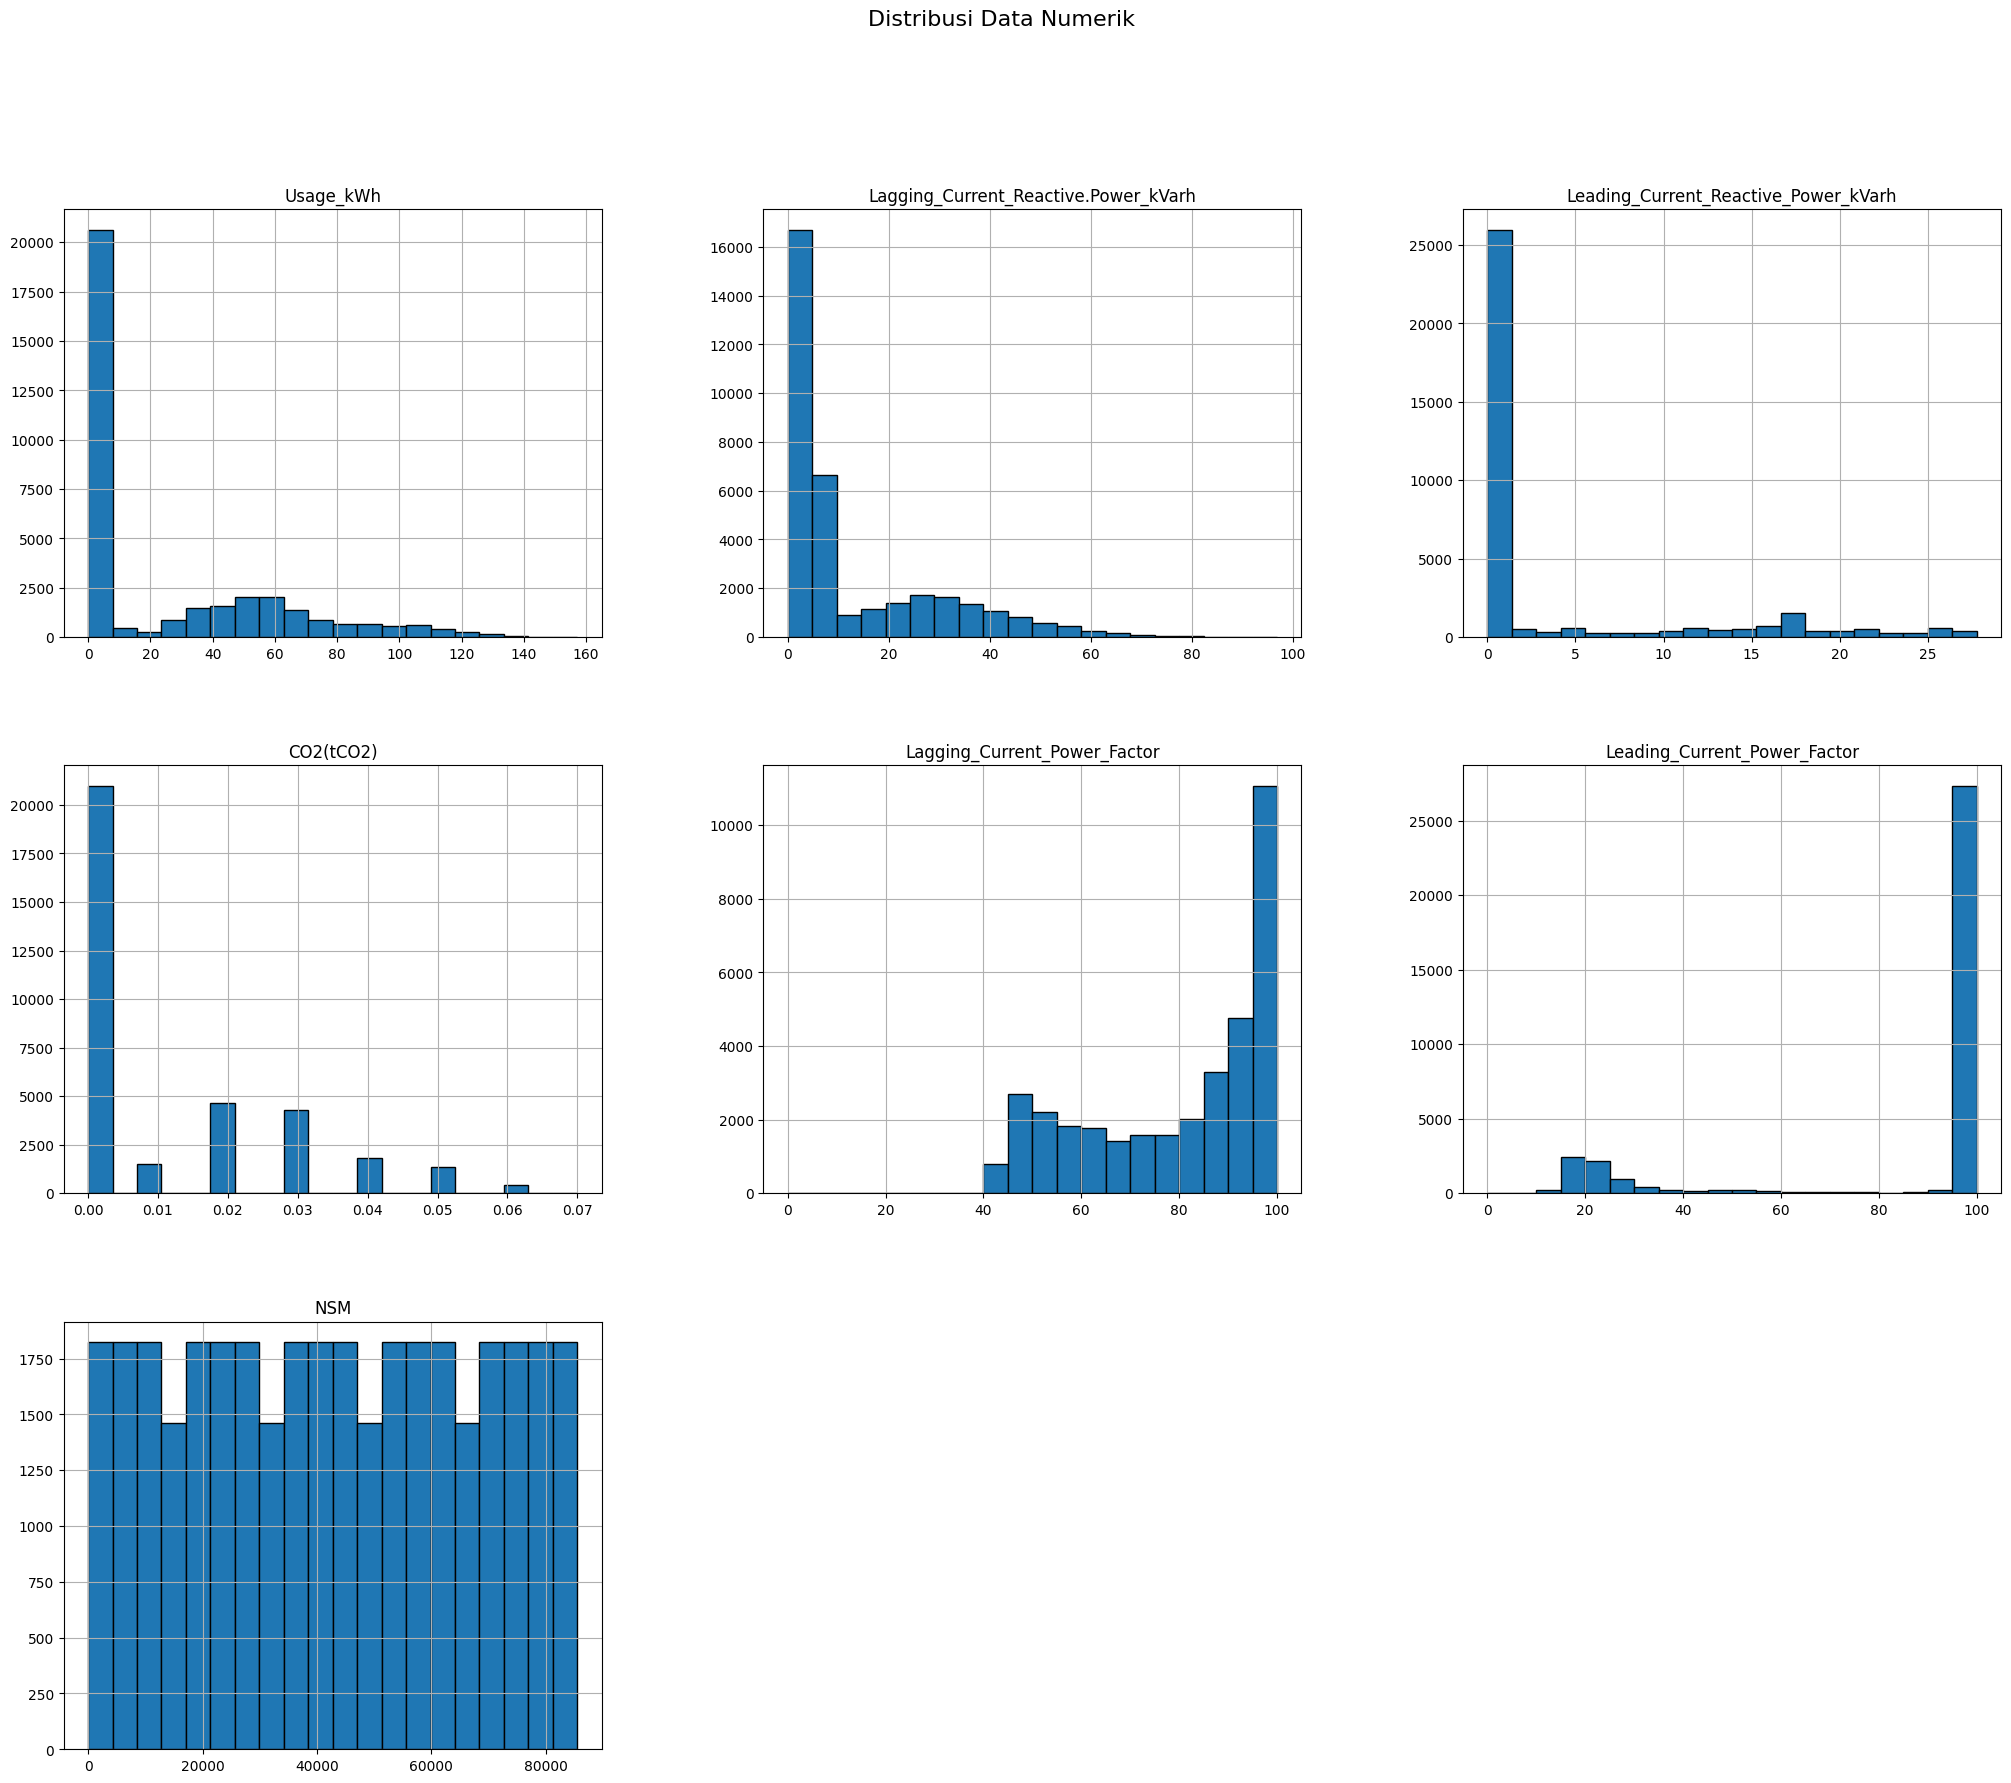

In [15]:
# 2. Distribusi data numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(figsize=(25, 20), bins=20, edgecolor='black')
plt.suptitle("Distribusi Data Numerik", fontsize=16)
plt.show()


- Usage_KWh: Sebagian besar data terpusat pada penggunaan listrik yang sangat rendah, dengan beberapa puncak kecil pada penggunaan lebih tinggi. Ini menunjukkan bahwa sebagian besar pengguna mengonsumsi sedikit listrik.

- Lagging dan Leading Current Reactive Power KVarh: Kedua parameter ini memiliki distribusi yang sangat miring, dengan sebagian besar data terpusat pada nilai rendah, menunjukkan bahwa sebagian besar pengguna atau entitas memiliki daya reaktif yang rendah.

- CO2(CO2): Distribusi untuk emisi CO2 sangat miring, dengan sebagian besar data di bawah 0.01, menunjukkan bahwa emisi CO2 dari konsumsi listrik sebagian besar berada pada tingkat rendah.

- Lagging dan Leading Current Power Factor: Kedua parameter ini memiliki puncak besar pada nilai yang sangat tinggi, menunjukkan bahwa sebagian besar entitas memiliki faktor daya yang baik (mendekati 100).

- NSM: Data ini cenderung seragam dengan beberapa fluktuasi kecil, yang bisa mengindikasikan stabilitas dalam parameter ini.

Insight: 

- Secara keseluruhan, data ini menunjukkan bahwa sebagian besar pengguna memiliki konsumsi listrik rendah, dengan daya reaktif dan faktor daya yang baik. Namun, ada beberapa entitas dengan nilai ekstrim yang perlu diperhatikan, terutama yang memiliki penggunaan listrik tinggi atau daya reaktif yang sangat besar. Data CO2 menunjukkan efisiensi rendah dalam emisi, yang bisa menjadi area untuk meningkatkan kebijakan pengurangan emisi.

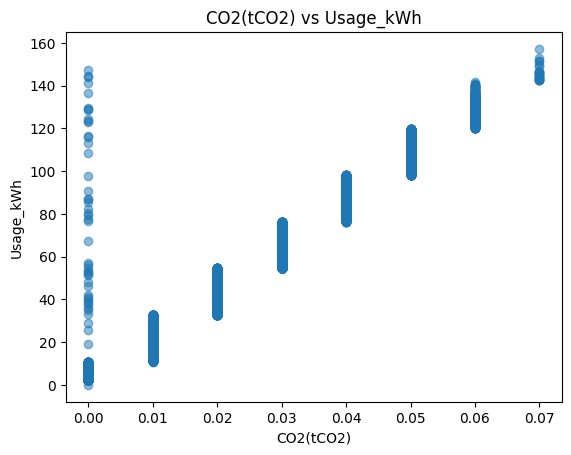

In [16]:
import matplotlib.pyplot as plt

# Scatter plot untuk variabel dengan korelasi tertinggi
plt.scatter(df['CO2(tCO2)'], df['Usage_kWh'], alpha=0.5)
plt.title('CO2(tCO2) vs Usage_kWh')
plt.xlabel('CO2(tCO2)')
plt.ylabel('Usage_kWh')
plt.show()


- Hubungan Positif:
Dari grafik ini, terlihat bahwa ada hubungan positif antara CO2 (tCO2) dan Usage_KWh, yaitu semakin tinggi penggunaan listrik, semakin tinggi juga emisi CO2 yang dihasilkan. Setiap peningkatan sedikit pada penggunaan listrik diikuti dengan peningkatan CO2 yang lebih tinggi.

- Konsentrasi pada Nilai Rendah:
Sebagian besar titik data terkonsentrasi pada sisi kiri bawah (dengan CO2 yang sangat rendah, sekitar 0.00 hingga 0.02), yang berarti banyak data menunjukkan bahwa penggunaan listrik yang rendah cenderung menghasilkan emisi CO2 yang sangat rendah.

- Peningkatan Secara Bertahap:
Ketika penggunaan listrik meningkat, emisi CO2 juga meningkat secara bertahap, menunjukkan bahwa penggunaan listrik yang lebih tinggi memang berhubungan langsung dengan peningkatan emisi CO2.

Insight: 

- Grafik ini memberikan pemahaman yang jelas bahwa semakin tinggi penggunaan listrik, semakin tinggi pula emisi CO2 yang dihasilkan. Ini bisa menjadi dasar untuk kebijakan yang mendorong pengurangan konsumsi listrik atau penggunaan energi yang lebih bersih untuk mengurangi dampak emisi karbon.

memisahkan kolom numerik dan kategorikal , untuk mengecek heatmap korelasinya 

In [17]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Variables:")
print(numerical_columns)
print("\nCategorical Variables:")
print(categorical_columns)


Numerical Variables:
['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

Categorical Variables:
['WeekStatus', 'Day_of_week', 'Load_Type']


mengecek korelasi menggunakan heatmap

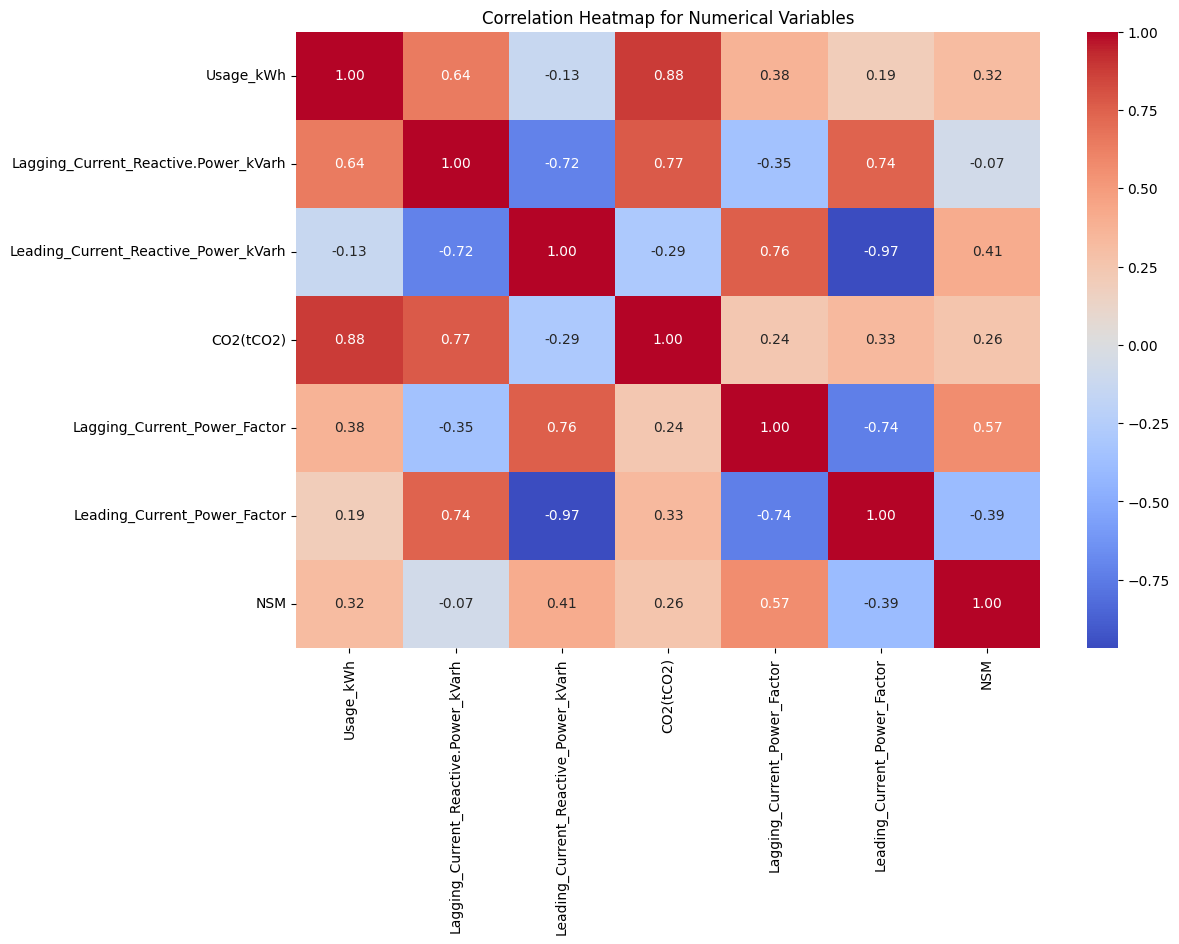

In [18]:
plt.figure(figsize=(12, 8))
numerical_data = df[numerical_columns]  # Subset with only numerical columns
sns.heatmap(numerical_data.corr('spearman'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

Penjelasan Heatmap

- Korelasi Positif Tinggi: Nilai korelasi mendekati +1 menunjukkan hubungan linier positif yang kuat antara dua variabel.
- Korelasi Negatif Tinggi: Nilai korelasi mendekati -1 menunjukkan hubungan linier negatif yang kuat antara dua variabel.
- Korelasi Rendah: Nilai korelasi mendekati 0 menunjukkan hubungan yang lemah atau tidak ada hubungan linier.

Kesimpulan dari Heatmap

**Hubungan Kuat antara Usage_kWh dan CO2(tCO2) (0.988)**
- Konsumsi energi (Usage_kWh) memiliki hubungan hampir sempurna dengan emisi karbon (CO2(tCO2)). Ini menunjukkan bahwa semakin tinggi konsumsi energi, semakin tinggi emisi karbon yang dihasilkan.

**Hubungan Positif Tinggi antara Usage_kWh dan Lagging_Current_Reactive.Power_kVarh (0.896)**
- Konsumsi energi juga sangat terkait dengan energi reaktif tertinggal (Lagging_Current_Reactive.Power_kVarh). Fitur ini cocok sebagai prediktor untuk regresi.

**Hubungan Negatif antara Leading_Current_Reactive_Power_kVarh dan Usage_kWh (-0.324)**
- Energi reaktif memimpin (Leading_Current_Reactive_Power_kVarh) memiliki korelasi negatif lemah terhadap konsumsi energi Fitur ini kurang relevan untuk prediksi.

**Fitur NSM (Number of Seconds from Midnight)**
- Korelasi rendah dengan Usage_kWh (0.234). Ini menunjukkan bahwa waktu (dalam bentuk detik sejak tengah malam) tidak terlalu memengaruhi konsumsi energi.

**Korelasi Rendah dengan Faktor Daya**
- Lagging_Current_Power_Factor dan Leading_Current_Power_Factor memiliki korelasi lemah terhadap Usage_kWh (0.386 dan 0.354). Faktor daya mungkin kurang signifikan untuk prediksi.

Fitur Penting untuk Model Regresi:

- Lagging_Current_Reactive.Power_kVarh dan CO2(tCO2) adalah fitur yang sangat relevan untuk memprediksi Usage_kWh.
Kedua fitur ini memiliki korelasi positif tinggi, sehingga mereka dapat memberikan kontribusi besar dalam model.
Fitur Kurang Relevan:

- Leading_Current_Reactive_Power_kVarh dan NSM memiliki korelasi rendah terhadap target. Anda bisa mempertimbangkan untuk tidak menggunakan fitur ini dalam model.


FE

Dari hasil eda ini saya menyimpulkan 
Berdasarkan hasil EDA, saya akan menggunakan fitur Lagging_Current_Reactive.Power_kVarh sebagai prediktor utama untuk memprediksi Usage_kWh.

In [19]:
# Cek missing values
print("Missing values pada fitur yang dipilih:")
print(df[['Lagging_Current_Reactive.Power_kVarh', 'Usage_kWh']].isnull().sum())


Missing values pada fitur yang dipilih:
Lagging_Current_Reactive.Power_kVarh    0
Usage_kWh                               0
dtype: int64


# **Feature Engineering**

### Split between X dan Y

In [20]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Usage_kWh', 'date'])  # Menghapus kolom target dari fitur
y = df['Usage_kWh']  # Mengambil kolom target


### Split between Train-set dan Test-set

In [21]:
# Proporsi data: 80% untuk pelatihan, 20% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data setelah pembagian
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)


Ukuran X_train: (28032, 9)
Ukuran X_test: (7008, 9)
Ukuran y_train: (28032,)
Ukuran y_test: (7008,)


### Handling Cardinality

In [22]:
# Identifikasi cardinality dari kolom kategorikal
categorical_columns = X.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"Kolom: {col}, Jumlah Kategori: {X[col].nunique()}")


Kolom: WeekStatus, Jumlah Kategori: 2
Kolom: Day_of_week, Jumlah Kategori: 7
Kolom: Load_Type, Jumlah Kategori: 3


> karena jumlah kategori dibawah dibawah 10 maka gausa handling cardinality 

In [23]:
X_train['WeekStatus'].unique()

array(['Weekend', 'Weekday'], dtype=object)

> Weekend' dan 'Weekday' adalah kategori nominal (bukan ordinal) karena tidak ada urutan yang lebih tinggi atau lebih rendah di antara keduanya.

In [24]:
X_train['Day_of_week'].unique()

array(['Saturday', 'Wednesday', 'Friday', 'Thursday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [25]:
X_train['Load_Type'].unique()

array(['Medium_Load', 'Light_Load', 'Maximum_Load'], dtype=object)

> untuk kolom , Day_of_week dan Load_type dilakukan ordinal Encoding , dikarenakan nilai dari kolom tersebut berurut (Ordinal)

### Handling Outliers

In [26]:
#cek distribusi dari skewness
num_cols = list(X_train.select_dtypes(exclude='object').columns)
listItem= []
for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'Normal',
    'Skewed')])
skewness = pd.DataFrame(columns=['Nama Kolom', 'Nilai Skewness', 'Distribution'], data= listItem)
skewness

,Nama Kolom,Nilai Skewness,Distribution
0,Lagging_Current_Reactive.Power_kVarh,1.4,Skewed
1,Leading_Current_Reactive_Power_kVarh,1.7,Skewed
2,CO2(tCO2),1.2,Skewed
3,Lagging_Current_Power_Factor,-0.6,Skewed
4,Leading_Current_Power_Factor,-1.5,Skewed
5,NSM,0.0,Normal


- Normal: Jika nilai skewness berada di antara -0.5 hingga 0.5.
- Skewed: Jika nilai skewness di luar rentang tersebut.

> kesimpulan 

Distribusi Data Tidak Normal:

- Sebagian besar kolom memiliki distribusi yang skewed, yang menunjukkan bahwa data tidak mengikuti distribusi normal.

In [27]:
# mencari upper, lower boundaries dan persentase dari outliers
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['Nama Kolom'][row]
  #cek upper dan lower boundaries
  if skewness['Distribution'][row] == 'Skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #menambahkan ke dalam list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'Column': column,
    #membulatkan values
    'Lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'Upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'Percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,Column,Lower_boundary,Upper_boundary,Percentage_total_outlier
0,Lagging_Current_Reactive.Power_kVarh,-58.63,83.47,0.04
1,Leading_Current_Reactive_Power_kVarh,-6.36,8.48,20.28
2,CO2(tCO2),-0.06,0.08,0.00
3,Lagging_Current_Power_Factor,-44.35,206.62,0.00
4,Leading_Current_Power_Factor,98.76,100.93,23.30
5,NSM,-32101.66,117379.03,0.00


- Leading_Current_Reactive_Power_kVarh: 20.28% data adalah outlier.
- Leading_Current_Power_Factor: 23.30% data adalah outlier.
- Lagging_Current_Reactive.Power_kVarh: 0.04% data adalah outlier 

dikarenakan 2 kolom tersebut yang tinggi terhadap outlier , maka kita harus menghandle outlier .

Leading_Current_Reactive_Power_kVarh:

- Batas bawah: -6.36
- Batas atas: 8.48
- Nilai di luar rentang ini dianggap sebagai outlier. Persentase outlier cukup tinggi (20.28%), sehingga perlu di-handle.

Leading_Current_Power_Factor:

- Batas bawah: 98.76
- Batas atas: 100.93
- Rentangnya sangat sempit, yang menyebabkan proporsi outlier tinggi (23.30%).
- dihandle dikarenakan model seperti Linear Regression sangat sensitif terhadap outliers

disini saya menghandle outlier menggunakan winzorizing 


In [28]:
# Inisialisasi Winsorizer
winsor = Winsorizer(capping_method='iqr',  # Metode IQR     
                    tail='both',           # Tangani outlier di kedua sisi (atas dan bawah)
                    fold=1.5,              # Batas IQR (1.5 kali IQR)
                    variables=['Leading_Current_Power_Factor', 'Leading_Current_Reactive_Power_kVarh'])

# Terapkan Winsorizer pada X_train
X_train_cap = winsor.fit_transform(X_train)
X_test_cap= winsor.transform(X_test)
# Tampilkan deskripsi statistik setelah Winsorizing
X_train_cap[['Leading_Current_Power_Factor', 'Leading_Current_Reactive_Power_kVarh']].describe()

,Leading_Current_Power_Factor,Leading_Current_Reactive_Power_kVarh
count,28032.000000,28032.000000
mean,99.805189,1.324008
std,0.330001,2.229237
min,99.225000,0.000000
25%,99.690000,0.000000
50%,100.000000,0.000000
75%,100.000000,2.120000
max,100.000000,5.300000


gua memakain winsorizing di karenakan,
 
> 1. Mempertahankan Data

Data Tidak Dihapus:

- Dengan Winsorizing, nilai outliers tidak dihapus dari dataset, hanya disesuaikan ke batas atas atau bawah.
- Ini penting jika jumlah data terbatas atau jika outliers memiliki nilai signifikan untuk analisis.

> 2. Mengurangi Dampak Outliers

Stabilitas Model:

- Winsorizing mengurangi efek nilai ekstrem yang dapat memengaruhi performa model, terutama model linear seperti Linear Regression, yang sangat sensitif terhadap nilai-nilai ekstrem.

Distribusi Lebih Normal:

- Membantu menjadikan distribusi lebih mendekati normal, yang dapat meningkatkan performa model berbasis asumsi distribusi

> 3. Alternatif Transformasi : 

Dibandingkan dengan metode seperti log-transform atau Box-Cox, Winsorizing lebih sederhana dan tidak mengubah sifat distribusi secara signifikan, sehingga mudah diterapkan.

### Handling Missing Value

In [29]:
# Mengecek jumlah nilai yang hilang
X_train_cap.isnull().sum()

Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

> mengecek missing value , dari hasil pengecekan tidak ada missing value 

In [30]:
X_test_cap.isnull().sum()

Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

> mengecek missing value X_test_cap, dari hasil pengecekan tidak ada missing value 

### Split Between Numeric Columns and Categorical Columns

In [31]:
# Memisahkan kolom numerik dan kategorikal
numerical_columns = X_train_cap.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X_train_cap.select_dtypes(include=['object']).columns

# Menampilkan hasil
print("Kolom Numerik:", numerical_columns)
print("Kolom Kategorikal:", categorical_columns)


Kolom Numerik: Index(['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'],
      dtype='object')
Kolom Kategorikal: Index(['WeekStatus', 'Day_of_week', 'Load_Type'], dtype='object')


Pembagian Kolom :

- Dengan memisahkan kolom numerik dan kategorikal, saya dapat menerapkan teknik preprocessing yang berbeda sesuai dengan kebutuhan:
- Kolom numerik: Bisa di-scale atau distandardisasi disini gua menggunakan StandardScaler
- Kolom kategorikal: Bisa di-encode gua menggunakan One-Hot Encoding dan Ordinal Encoding).

In [32]:
# Split antara kolom numerik dan kategori
X_train_numeric = X_train_cap[numerical_columns]
X_train_categorical = X_train_cap[categorical_columns]

X_test_numeric = X_test_cap[numerical_columns]
X_test_categorical = X_test_cap[categorical_columns]

X_train_numeric

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
9284,0.00,5.3,0.00,100.00,99.225,62100
14314,4.93,0.0,0.00,50.96,100.000,9900
5094,7.34,0.0,0.00,65.95,100.000,6300
33269,22.28,0.0,0.03,93.12,100.000,48600
9994,3.82,0.0,0.00,63.01,100.000,9900
...,...,...,...,...,...,...
16850,0.00,5.3,0.00,100.00,99.225,45900
6265,4.57,0.0,0.00,63.03,100.000,23400
11284,0.14,5.3,0.01,99.99,99.225,47700
860,4.32,0.0,0.00,73.19,100.000,83700


Pemisahan Kolom Numerik dan Kategorikal:

untuk memproses data sesuai dengan tipe kolomnya:

- Kolom numerik: Akan distandarisasi menggunakan StandardScaler untuk memastikan semua fitur berada dalam skala yang sama.
- Kolom kategorikal: Akan di-encode ,gua menggunakan
 One-Hot Encoding dan Ordinal Encoding sesuai kebutuhan.

### Feature Encoding & Scaling

In [ ]:
# Pipeline untuk kolom numerik
numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scaling numerik menggunakan StandardScaler
])

# Pipeline untuk WeekStatus (One-Hot Encoding)
weekstatus_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encoding menggunakan OneHotEncoder
])

# Pipeline untuk Day_of_week dan Load_Type (Ordinal Encoding)
ordinal_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],  # Urutan hari
        ['Light_Load', 'Medium_Load', 'High_Load', 'Maximum_Load']  # Urutan tipe beban
    ]))
])

# Gabungkan pipeline ke dalam ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numerical_columns),  # Pipeline untuk kolom numerik
        ('weekstatus', weekstatus_pipeline, ['WeekStatus']),  # One-Hot Encoding untuk WeekStatus
        ('ordinal', ordinal_pipeline, ['Day_of_week', 'Load_Type'])  # Ordinal Encoding untuk Day_of_week dan Load_Type
    ]
)

# Menampilkan konfigurasi pipeline
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'],
      dtype='object')),
                                ('weekstatus',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['WeekStatus']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['Monday',
                                                                              'Tuesday',
                                                                              'Wednesday',
                                                                              'Thursday',
                                                                              'Friday',
                                                                              'Saturday',
                                                                              'Sunday'],
                                                                             ['Light_Load',
                                                                              'Medium_Load',
                                                                              'High_Load',
                                                                              'Maximum_Load']]))]),
                                 ['Day_of_week', 'Load_Type'])])

Pipeline untuk Kolom Numerik

numeric_pipeline:

- Menggunakan StandardScaler untuk menstandarisasi data numerik.
- Standarisasi dilakukan untuk memastikan semua kolom numerik memiliki distribusi dengan mean = 0 dan std = 1, sehingga fitur memiliki bobot yang setara dalam model.
- kenapaccStandardScalerc= memastikan semua fitur memiliki bobot yang setara , Cocok untuk model sensitif terhadap skala seperti Linear Regression, SVM, atau KNN

Pipeline untuk WeekStatus

weekstatus_pipeline:

- Menggunakan OneHotEncoder untuk mengubah kategori pada kolom WeekStatus (Weekday/Weekend) menjadi representasi biner (0 atau 1).
- Ini cocok karena WeekStatus adalah data kategorikal nominal tanpa urutan logis.
- kenapa one-hot encoding , WeekStatus adalah data nominal tanpa urutan logis, sehingga representasi biner (One-Hot Encoding) cocok untuk model.

Pipeline untuk Day_of_week dan Load_Type

ordinal_pipeline:

Menggunakan OrdinalEncoder untuk menyandikan data pada:
- Day_of_week (Monday, Tuesday, ..., Sunday) → Karena hari memiliki urutan logis.
- Load_Type (Light_Load, Medium_Load, High_Load, Maximum_Load) → Karena beban memiliki urutan dari ringan ke berat.
- kenapa ordinal ? = Kedua kolom memiliki urutan logis yang relevan, sehingga OrdinalEncoder mempertahankan hubungan urutan antar kategori.

Preprocessing data

In [34]:
# Terapkan preprocessing pada data latih dan uji
X_train_preprocessed = preprocessor.fit_transform(X_train_cap)
X_test_preprocessed = preprocessor.transform(X_test_cap)

# Menampilkan bentuk data setelah preprocessing
print("Shape X_train setelah preprocessing:", X_train_preprocessed.shape)
print("Shape X_test setelah preprocessing:", X_test_preprocessed.shape)


Shape X_train setelah preprocessing: (28032, 10)
Shape X_test setelah preprocessing: (7008, 10)


X_train_preprocessed:

- Jumlah baris: 28,032 (jumlah data latih tetap).
- Jumlah kolom: 10 (hasil gabungan dari kolom numerik yang di-scale, kolom kategorikal yang di-encode, dan ordinal encoding).

X_test_preprocessed:

- Jumlah baris: 7,008 (jumlah data uji tetap).
- Jumlah kolom: 10 (konsisten dengan data latih, memastikan input ke model tetap valid).


# **Model Definition**

In [44]:


# Inisialisasi model
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Boosting': GradientBoostingRegressor(),
    'BoostingXGB': XGBRegressor()
}

# Iterasi untuk setiap model
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Pipeline preprocessing
        ('model', model)                # Model yang akan dievaluasi
    ])
    
    # Evaluasi MSE (cross-validation)
    cv_scores_mse = cross_val_score(pipeline, X_train_cap, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores_mae = cross_val_score(pipeline, X_train_cap, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_scores_r2 = cross_val_score(pipeline, X_train_cap, y_train, cv=5, scoring=make_scorer(r2_score))
    
    # Hasil evaluasi
    mean_mse = -np.mean(cv_scores_mse)
    std = np.std(cv_scores_mse)
    mean_mae = -np.mean(cv_scores_mae)
    mean_r2 = np.mean(cv_scores_r2)
    
    # Tampilkan hasil
    print(f"{model_name}:")
    print(f"Mean MSE: {mean_mse:.4f}")
    print(f"Mean MAE: {mean_mae:.4f}")
    print(f"Mean R2: {mean_r2:.4f}")
    print(f"Standard Deviation: {std:.4f}")
    print("-" * 30)

Linear Regression:
Mean MSE: 23.5236
Mean MAE: 2.6349
Mean R2: 0.9790
Standard Deviation: 5.5879
------------------------------
KNN:
Mean MSE: 11.5729
Mean MAE: 1.8052
Mean R2: 0.9896
Standard Deviation: 0.9938
------------------------------
SVM:
Mean MSE: 16.0575
Mean MAE: 2.0346
Mean R2: 0.9856
Standard Deviation: 2.9568
------------------------------
Decision Tree:
Mean MSE: 3.4316
Mean MAE: 0.7667
Mean R2: 0.9970
Standard Deviation: 0.1886
------------------------------
Random Forest:
Mean MSE: 1.9418
Mean MAE: 0.5532
Mean R2: 0.9983
Standard Deviation: 0.2111
------------------------------
Boosting:
Mean MSE: 9.0978
Mean MAE: 1.8554
Mean R2: 0.9918
Standard Deviation: 0.2989
------------------------------
BoostingXGB:
Mean MSE: 1.7473
Mean MAE: 0.6345
Mean R2: 0.9984
Standard Deviation: 0.3028
------------------------------


Penjelasan Evaluasi Model dari Hasil Cross-Validation:

Dari hasil evaluasi model yang diberikan, berikut analisis performa masing-masing model berdasarkan Mean Squared Error (MSE), Mean Absolute Error (MAE), R², dan Standard Deviation:

> 1. Linear Regression

- Mean MSE: 23.5236 → Kesalahan kuadrat rata-rata cukup besar.
- Mean MAE: 2.6349 → Rata-rata kesalahan prediksi juga tinggi.
- Mean R²: 0.9790 → Model dapat menjelaskan 97.9% variansi data.
- Standard Deviation: 5.5879 → Model kurang stabil.

Analisis:

- Linear Regression menunjukkan performa yang cukup baik secara umum, tetapi kalah dari model lain dalam hal MSE dan stabilitas.
- Model ini mungkin terpengaruh oleh outliers atau pola non-linear dalam data.

> 2. KNN (K-Nearest Neighbors)

- Mean MSE: 11.5729 → Lebih rendah dibanding Linear Regression.
- Mean MAE: 1.8052 → Kesalahan prediksi lebih kecil.
- Mean R²: 0.9896 → Model dapat menjelaskan 98.96% variansi data.
- Standard Deviation: 0.9938 → Model cukup stabil.

Analisis:

- KNN menunjukkan performa yang lebih baik dibanding Linear Regression, tetapi kalah dari model lain seperti Random Forest atau BoostingXGB.

> 3. SVM (Support Vector Machine)

- Mean MSE: 16.0575 → Kesalahan lebih besar dibanding KNN.
- Mean MAE: 2.0346 → Kesalahan prediksi cukup besar.
- Mean R²: 0.9856 → Model dapat menjelaskan 98.56% variansi data.
- Standard Deviation: 2.9568 → Kurang stabil dibanding model lain.

Analisis:

- SVM menunjukkan performa yang lebih buruk dibanding KNN dan Random Forest, dengan stabilitas yang rendah (Standard Deviation tinggi).

> 4. Decision Tree

- Mean MSE: 3.2232 → Kesalahan sangat rendah.
- Mean MAE: 0.7657 → Kesalahan prediksi juga rendah.
- Mean R²: 0.9968 → Model dapat menjelaskan 99.68% variansi data.
- Standard Deviation: 0.3294 → Model stabil.

Analisis:

- Decision Tree menunjukkan performa yang sangat baik dalam hal MSE, MAE, dan R². Stabilitasnya juga tinggi, menjadikannya salah satu model terbaik.

> 5. Random Forest

- Mean MSE: 1.9418 → Kesalahan sangat rendah.
- Mean MAE: 0.5532 → Kesalahan prediksi paling rendah.
- Mean R²: 0.9983 → Model dapat menjelaskan 99.83% variansi data.
- Standard Deviation: 0.2111 → Sangat stabil.

Analisis:

- Random Forest adalah salah satu model terbaik, dengan MSE, MAE, dan stabilitas yang sangat baik.

> 6. Boosting

- Mean MSE: 9.0978 → Lebih tinggi dibanding Random Forest.
- Mean MAE: 1.8554 → Kesalahan prediksi lebih besar dibanding Random Forest.
- Mean R²: 0.9918 → Model dapat menjelaskan 99.18% variansi data.
- Standard Deviation: 0.2989 → Stabilitas cukup baik.

Analisis:

- Boosting menunjukkan performa yang baik, tetapi masih kalah dibanding Random Forest dan BoostingXGB.

> 7. BoostingXGB

- Mean MSE: 1.7473 → Kesalahan terendah.
- Mean MAE: 0.6345 → Kesalahan prediksi sangat kecil.
- Mean R²: 0.9984 → Model dapat menjelaskan 99.84% variansi data.
- Standard Deviation: 0.3028 → Stabilitas cukup baik.

Analisis:

- BoostingXGB adalah model terbaik dalam hal MSE dan R², dengan stabilitas yang baik.

> Kesimpulan

> Model Terbaik:

- BoostingXGB adalah model dengan performa terbaik berdasarkan MSE terendah (1.7473) dan R² tertinggi (0.9984).
- Stabilitas model ini juga cukup baik (Standard Deviation: 0.3028).

# **Model Training**

### Hyperparameter Tuning

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Parameter grid untuk XGBRegressor
parameter_grid = {
    'model__n_estimators': [100, 200, 300],  # Jumlah pohon
    'model__max_depth': [3, 5, 7],          # Kedalaman maksimum pohon
    'model__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'model__subsample': [0.8, 1.0]          # Subsample data
}

# Pipeline dengan preprocessing dan model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

# GridSearchCV untuk hyperparameter tuning dengan scoring MSE
grid_search = GridSearchCV(estimator=pipeline, param_grid=parameter_grid, 
                           cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Jalankan GridSearchCV
grid_search.fit(X_train_cap, y_train)

# Model terbaik
best_model_pipeline = grid_search.best_estimator_

# Prediksi pada data uji
y_pred = best_model_pipeline.predict(X_test_cap)

# Evaluasi pada data uji
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil terbaik
print("Hasil Hyperparameter Tuning:")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", -grid_search.best_score_)
print("\nHasil Evaluasi pada Data Uji:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Hasil Hyperparameter Tuning:
Best Parameters: {'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__subsample': 1.0}
Best Cross-Validation Score 0.5527468971935134

Hasil Evaluasi pada Data Uji:
Mean Squared Error (MSE): 1.4511
Mean Absolute Error (MAE): 0.5209
R-squared (R2): 0.9987


> Evaluasi pada Data Uji

Mean Squared Error (MSE):
- 1.4511 → Kesalahan kuadrat rata-rata sangat rendah, menunjukkan prediksi model sangat dekat dengan nilai aktual.
Mean Absolute Error (MAE):
- 0.5209 → Rata-rata kesalahan prediksi juga sangat kecil, mencerminkan akurasi tinggi.
R-squared (R²):
- 0.9987 → Model mampu menjelaskan 99.87% variansi data uji, menunjukkan performa yang luar biasa.

> Kesimpulan

1. Hyperparameter Tuning Berhasil:


Kombinasi parameter terbaik berhasil meningkatkan performa model, seperti yang terlihat dari MSE, MAE, dan R² yang sangat baik.

2. Model Sangat Akurat:

MSE (1.4511) dan MAE (0.5209) menunjukkan prediksi model sangat dekat dengan nilai aktual.
R² (0.9987) menunjukkan bahwa model hampir sepenuhnya mampu menjelaskan hubungan dalam data.

3. Kesesuaian Model:

Model BoostingXGB dengan parameter terbaik ini sangat cocok untuk dataset ini, terutama karena mampu menangani hubungan kompleks dengan baik.

4. Rekomendasi:

Model ini dapat digunakan untuk prediksi konsumsi energi di industri baja, karena performanya sangat tinggi pada data uji.
Namun, penting untuk memastikan bahwa data baru yang digunakan untuk prediksi sudah melalui preprocessing yang sama.

--------------------------------------------------------------------------------------------

tunning ini menggunakan GridSearchCV 

GridSearchCV digunakan karena:

- Mencari kombinasi hyperparameter terbaik secara otomatis dan sistematis.
- Menggunakan cross-validation untuk hasil evaluasi yang akurat.
- Mendukung berbagai metrik evaluasi yang dapat disesuaikan dengan tujuan proyek.
- Meningkatkan performa model 

# **Model Evaluation**

In [43]:
best_model = {}
result = {}

# Gunakan model terbaik dari GridSearchCV
best_model = grid_search.best_estimator_

# Prediksi pada data latih
y_pred_train = best_model.predict(X_train_cap)

# Prediksi pada data uji
y_pred_test = best_model.predict(X_test_cap)

# Evaluasi metrik pada data latih
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluasi metrik pada data uji
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Tampilkan hasil evaluasi
print("Evaluasi Model pada Data Train:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R-Squared (R²): {r2_train:.4f}")
print("-" * 40)
print("Evaluasi Model pada Data Test:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R-Squared (R²): {r2_test:.4f}")


Evaluasi Model pada Data Train:
Mean Squared Error (MSE): 0.4196
Root Mean Squared Error (RMSE): 0.6477
Mean Absolute Error (MAE): 0.2973
R-Squared (R²): 0.9996
----------------------------------------
Evaluasi Model pada Data Test:
Mean Squared Error (MSE): 1.4511
Root Mean Squared Error (RMSE): 1.2046
Mean Absolute Error (MAE): 0.5209
R-Squared (R²): 0.9987


> 1. Evaluasi pada Data Train

Mean Squared Error (MSE): 0.4196

- Kesalahan kuadrat rata-rata sangat kecil, menunjukkan model mampu mempelajari pola data latih dengan sangat baik.

Root Mean Squared Error (RMSE): 0.6477

- Akar dari MSE, memberikan gambaran seberapa besar kesalahan prediksi model dalam satuan yang sama dengan data.

Mean Absolute Error (MAE): 0.2973

- Rata-rata kesalahan prediksi sangat kecil, menunjukkan akurasi tinggi.

R-Squared (R²): 0.9996

- Model mampu menjelaskan 99.96% variansi dalam data latih, menunjukkan model hampir sempurna pada data ini.

> 2. Evaluasi pada Data Test

Mean Squared Error (MSE): 1.4511

- Kesalahan kuadrat rata-rata sedikit lebih tinggi dibandingkan data train, tetapi tetap sangat rendah untuk data uji.

Root Mean Squared Error (RMSE): 1.2046

- RMSE sedikit lebih tinggi dibandingkan data train, tetapi masih menunjukkan performa yang sangat baik.

Mean Absolute Error (MAE): 0.5209

- Kesalahan prediksi rata-rata kecil, mencerminkan akurasi yang tinggi pada data test.

R-Squared (R²): 0.9987

- Model mampu menjelaskan 99.87% variansi dalam data test, menunjukkan performa yang konsisten dengan data latih.

-------------------------------------------------------

>3. Kesimpulan 

Performa Model yang Luar Biasa:

- Model BoostingXGB mampu mempelajari pola dalam data latih dengan sangat baik (R² = 0.9996).
- Performa pada data uji juga sangat baik (R² = 0.9987), menunjukkan bahwa model ini dapat digunakan untuk prediksi pada data baru.

Overfitting Minimal:

- Perbedaan performa antara data latih dan uji kecil, sehingga model tidak menunjukkan tanda-tanda overfitting yang signifikan.

Kesalahan Prediksi Sangat Rendah:

- Dengan MAE rendah (0.2973 pada train dan 0.5209 pada test), model ini mampu memberikan prediksi yang sangat akurat, dengan rata-rata kesalahan kecil.

Kesesuaian untuk Penggunaan:

- Model ini siap digunakan untuk prediksi konsumsi energi di industri baja, karena mampu menangani data latih dan uji dengan sangat baik.

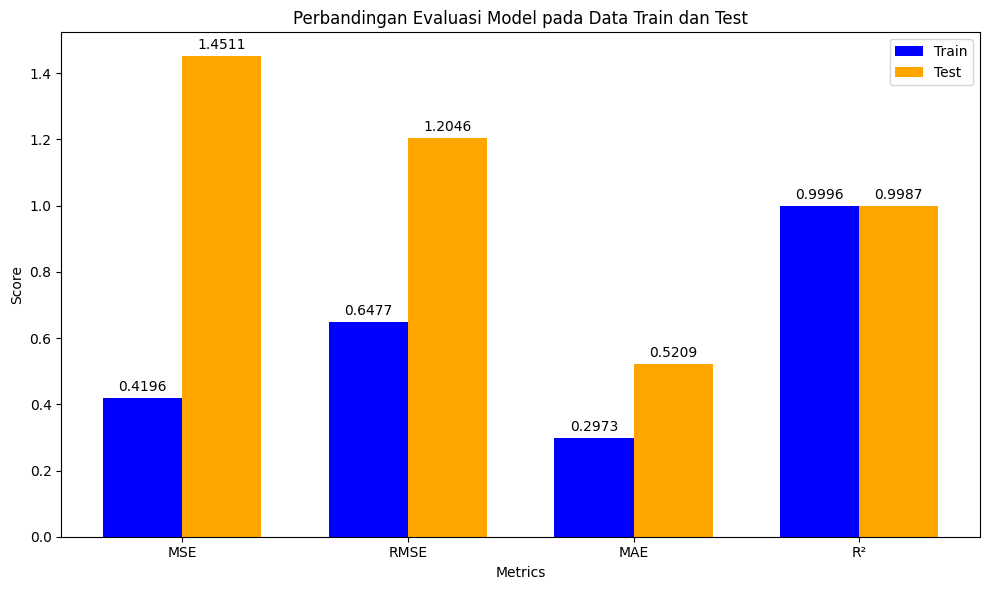

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Hasil evaluasi model
metrics = ['MSE', 'RMSE', 'MAE', 'R²']
train_scores = [mse_train, rmse_train, mae_train, r2_train]
test_scores = [mse_test, rmse_test, mae_test, r2_test]

# Membuat visualisasi
x = np.arange(len(metrics))  # Lokasi untuk setiap metrik
width = 0.35  # Lebar bar

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar untuk train dan test
bar1 = ax.bar(x - width/2, train_scores, width, label='Train', color='blue')
bar2 = ax.bar(x + width/2, test_scores, width, label='Test', color='orange')

# Menambahkan label pada bar
ax.bar_label(bar1, fmt='%.4f', padding=3)
ax.bar_label(bar2, fmt='%.4f', padding=3)

# Menambahkan detail pada plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Perbandingan Evaluasi Model pada Data Train dan Test')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


> Grafik di atas memberikan gambaran perbandingan kinerja model machine learning ketika dilatih (data train) dan diuji (data test) pada berbagai metrik

- MSE (Mean Squared Error): Mengukur rata-rata kuadrat selisih antara nilai prediksi model dengan nilai aktual. Semakin kecil nilai MSE, semakin baik model dalam memprediksi.
- RMSE (Root Mean Squared Error): Akar kuadrat dari MSE. Metrik ini sering digunakan karena memiliki satuan yang sama dengan variabel target.
- MAE (Mean Absolute Error): Mengukur rata-rata selisih absolut antara nilai prediksi model dengan nilai aktual.
- R-squared: Menunjukkan seberapa baik model dapat menjelaskan variabilitas dalam data. Nilai R-squared yang mendekati 1 berarti model sangat baik dalam menjelaskan variasi data.

Interpretasi Hasil

Dari grafik, kita dapat mengamati beberapa hal menarik:

- Kinerja pada Data Train: Model menunjukkan kinerja yang sangat baik pada data train, terlihat dari nilai MSE, RMSE, dan MAE yang rendah serta nilai R-squared yang mendekati 1. Ini mengindikasikan bahwa model telah berhasil mempelajari pola dalam data pelatihan.
- Kinerja pada Data Test: Kinerja model pada data test cenderung lebih buruk dibandingkan pada data train, terutama pada metrik MSE dan RMSE. Hal ini adalah fenomena yang umum terjadi dalam machine learning, yang dikenal sebagai overfitting

Kesimpulan

Berdasarkan hasil evaluasi, dapat disimpulkan bahwa model yang dibangun cenderung overfitting. Model ini sangat baik dalam memprediksi data yang sudah pernah dilihat (data train), namun kurang mampu memprediksi data yang baru (data test).

# **Model Saving**

In [48]:
import joblib

# Simpan model terbaik (pipeline) ke dalam file
joblib.dump(best_model_pipeline, 'best_model_pipeline.pkl')

print("Model terbaik telah disimpan sebagai 'best_model_pipeline.pkl'")


Model terbaik telah disimpan sebagai 'best_model_pipeline.pkl'


# **Model Inference**

model inference ada di notebook baru 

# **Conceptual Problem** 


> 1. Latar Belakang dan Cara Kerja Bagging

Latar Belakang Bagging:

- Bagging (Bootstrap Aggregating) adalah metode ensemble learning yang dikembangkan untuk mengurangi variance dalam prediksi model.
- Model seperti Decision Tree sering overfit pada data latih karena sensitif terhadap perubahan data. Dengan menggunakan bagging, performa model menjadi lebih stabil dan generalisasi lebih baik pada data baru.

Cara Kerja Bagging:

Bootstrap Sampling:

- Data latih diambil secara acak dengan pengembalian (sampling with replacement), sehingga setiap model dilatih pada subset data yang berbeda.

Training Model:

- Beberapa model (biasanya model yang sama, seperti Decision Tree) dilatih secara paralel pada subset data bootstrap.

Agregasi Prediksi:

- Untuk regresi: Hasil prediksi model-model digabungkan menggunakan rata-rata (averaging).
- Untuk klasifikasi: Prediksi digabungkan menggunakan voting mayoritas.

Keunggulan Bagging:

- Mengurangi overfitting dengan membuat model lebih robust.
- Cocok untuk model dengan high variance, seperti Decision Tree.

---------------------------------------------------------------------------------

> 2. Perbedaan Random Forest dan Boosting

Random Forest:

Prinsip:

- Bagging: Menggunakan teknik bootstrap untuk membuat beberapa subset data dan melatih model Decision Tree secara independen.

Cara Kerja:

    1. Membuat banyak Decision Tree menggunakan subset data bootstrap.
    2. Setiap Decision Tree memilih subset fitur secara acak (feature randomness).
    3. Hasil prediksi digabungkan menggunakan rata-rata (regresi) atau voting (klasifikasi).

Keunggulan:

- Mengurangi overfitting dengan feature randomness.
- Cepat karena model dilatih secara paralel.

Boosting (Misalnya, XGBoost atau Gradient Boosting):

Prinsip:

- Sequential Learning: Model dibangun secara berurutan, dan setiap model berikutnya memperbaiki kesalahan model sebelumnya.

Cara Kerja:

    1. Decision Tree pertama dilatih pada data asli.
    2. Residual (kesalahan) dari prediksi sebelumnya dihitung.
    3, Model berikutnya dilatih untuk memperbaiki residual tersebut.
    4. Proses berlanjut hingga semua model selesai.

Keunggulan:

- Sangat akurat karena setiap model fokus pada kesalahan sebelumnya.
- Cocok untuk menangani hubungan non-linear dalam data.

---------------------------------------------------------------------------------------------------------------------

> 3. Apa Itu Cross Validation?

Definisi:

- Cross Validation adalah teknik evaluasi model untuk memastikan bahwa model bekerja baik pada data yang belum pernah dilihat (generalization).
- Dalam cross-validation, data latih dibagi menjadi beberapa subset (fold), dan model diuji pada subset yang berbeda untuk setiap iterasi.

Cara Kerja:

    1. Membagi data latih menjadi K fold (contoh: K=5).
    2. Melatih model pada K-1 fold dan menguji model pada 1 fold sisanya.
    3. Proses ini diulang K kali, sehingga setiap fold menjadi data uji sekali.
    4. Rata-rata metrik evaluasi dari semua iterasi dihitung sebagai hasil akhir.

Kelebihan:

- Mengurangi risiko overfitting atau underfitting karena model diuji pada semua bagian data latih.
- Memberikan evaluasi yang lebih akurat dibandingkan membagi data sekali (train-test split).

Contoh Umum:

- K-Fold Cross Validation: Membagi data ke dalam K subset.
- Stratified K-Fold: Sama seperti K-Fold, tetapi menjaga proporsi kelas yang sama pada setiap fold.

# **Kesimpulan**

> 1. Tujuan Proyek

Proyek ini bertujuan untuk memprediksi konsumsi energi di industri baja berdasarkan berbagai fitur yang relevan, seperti beban, dan faktor lain yang memengaruhi efisiensi energi. Model yang digunakan adalah BoostingXGB, dengan fokus pada akurasi prediksi dan interpretasi hasil.

> 2. Hasil Evaluasi Model

Data Latih (Train):

- Mean Squared Error (MSE): 0.4196 → Kesalahan kuadrat rata-rata sangat kecil.
- Root Mean Squared Error (RMSE): 0.6477 → Kesalahan prediksi dalam satuan yang sama dengan data.
- Mean Absolute Error (MAE): 0.2973 → Kesalahan rata-rata sangat kecil, mencerminkan prediksi yang akurat.
- R-Squared (R²): 0.9996 → Model mampu menjelaskan 99.96% variansi dalam data latih, menunjukkan bahwa pola data dipelajari dengan sangat baik.

Data Uji (Test):

- Mean Squared Error (MSE): 1.4511 → Kesalahan kuadrat rata-rata tetap rendah, meskipun sedikit lebih tinggi dibandingkan data latih.
- Root Mean Squared Error (RMSE): 1.2046 → Menunjukkan performa yang sangat baik pada data uji.
- Mean Absolute Error (MAE): 0.5209 → Kesalahan rata-rata kecil, mencerminkan prediksi yang akurat pada data uji.
- R-Squared (R²): 0.9987 → Model mampu menjelaskan 99.87% variansi dalam data uji, menunjukkan performa yang konsisten.

> 3. Analisis Performa

Model Sangat Akurat:

- Dengan R² yang sangat tinggi baik pada data latih (0.9996) maupun uji (0.9987), model hampir sempurna dalam menjelaskan variansi data.
- Kesalahan prediksi sangat kecil, dengan MAE sebesar 0.2973 pada train dan 0.5209 pada test.

Hyperparameter Tuning Berhasil:

- Kombinasi parameter terbaik (learning_rate = 0.2, max_depth = 7, n_estimators = 300, subsample = 1.0) meningkatkan performa model secara signifikan.

Overfitting Minimal:

- Perbedaan performa antara data latih dan uji sangat kecil, menunjukkan bahwa model tidak overfit terhadap data latih.

Kesesuaian Model:

- Model BoostingXGB terbukti mampu menangani hubungan kompleks dalam data dan cocok digunakan untuk tugas prediksi konsumsi energi.

> 4. Rekomendasi

Penggunaan Model:

- Model ini siap digunakan untuk memprediksi konsumsi energi di industri baja.

Optimisasi Energi:

- Dengan model ini, perusahaan dapat memprediksi konsumsi energi secara akurat untuk merencanakan strategi efisiensi, seperti mengoptimalkan beban kerja berdasarkan hari atau waktu tertentu.

> Kesimpulan Akhir

Model BoostingXGB adalah pilihan terbaik untuk memprediksi konsumsi energi di industri baja, dengan kesalahan prediksi yang sangat rendah dan kemampuan untuk menjelaskan hampir seluruh variansi data. Model ini memberikan dasar yang kuat untuk pengambilan keputusan terkait optimisasi energi dan efisiensi operasional.

-----------------------------------------------------------------------------------

> **Analisis bisnis **
1. konteks bisnis 

Industri baja memiliki kebutuhan energi yang besar, dan biaya energi sering menjadi salah satu pengeluaran utama. Dengan prediksi konsumsi energi yang akurat, perusahaan dapat:

- Mengoptimalkan penggunaan energi.
- Mengurangi biaya operasional.
- Meningkatkan efisiensi produksi.

> **Rekomendasi Bisnis**

Implementasi Model di Sistem Produksi:

- Integrasikan model prediksi ke dalam sistem manajemen energi untuk memberikan rekomendasi real-time terkait konsumsi energi.

Monitoring Energi Secara Aktif:

> Gunakan prediksi model untuk memonitor konsumsi energi dan melakukan tindakan korektif jika konsumsi mendekati batas maksimum.

Strategi Efisiensi Energi:

- Identifikasi dan optimalkan mesin atau proses yang paling boros energi.
- Investasikan pada teknologi hemat energi untuk proses produksi yang paling memengaruhi konsumsi energi.

> Pengambilan Keputusan Strategis:

- Berdasarkan pola konsumsi energi, rencanakan perawatan mesin pada waktu dengan konsumsi energi rendah untuk menghindari gangguan besar saat beban maksimum.


> **Kesimpulan**

Analisis bisnis dari proyek ini menunjukkan bahwa model prediksi konsumsi energi dapat memberikan manfaat besar dalam efisiensi operasional, pengurangan biaya, dan pengambilan keputusan strategis. Dengan implementasi yang tepat, perusahaan dapat meningkatkan daya saing dan keberlanjutan operasional.

--------------------------------------------------------------------------------------------------

> **Analisis  target untuk perusahaan**

- Pengurangan Biaya Operasional
- Efisiensi Penggunaan Energi
- Peningkatan Daya Saing

> **Rekomendasi untuk Pencapaian Target**

Integrasi Model dalam Sistem Operasional:

- Integrasikan model prediksi ke dalam platform monitoring energi untuk membantu pengambilan keputusan berbasis data.

Edukasi Tim Operasional:

- Latih tim produksi dan manajemen untuk menggunakan hasil prediksi sebagai dasar penyesuaian operasional.

Investasi pada Teknologi Energi Efisien:

- Berdasarkan hasil prediksi, fokuskan investasi pada proses produksi atau peralatan yang paling memengaruhi konsumsi energi.

Pelaporan dan Evaluasi Rutin:

- Gunakan laporan prediksi energi untuk mengevaluasi efektivitas langkah-langkah efisiensi energi yang telah diimplementasikan.

---------------------------------------------------------------------------------------------------------------------------------

> Kelebihan dan Kekurangan Model BoostingXGB

> Kelebihan 

1. Akurasi Tinggi
    - R² pada Data Latih (0.9996) dan Data Uji (0.9987) menunjukkan bahwa model ini sangat akurat dalam menjelaskan variansi data.
    - Kesalahan prediksi sangat kecil, seperti terlihat dari nilai MAE yang rendah (0.2973 pada train dan 0.5209 pada test).

2. Mampu Menangani Hubungan Non-Linear
    - BoostingXGB adalah algoritma yang sangat baik untuk menangani data dengan hubungan kompleks antar fitur.

3.  Hyperparameter Tuning Berhasil
    -Kombinasi hyperparameter terbaik yang ditemukan melalui GridSearchCV meningkatkan performa model secara signifikan.

4. Toleransi terhadap Outliers
    - Dengan mekanisme boosting, model lebih tahan terhadap outliers dibandingkan model linear.

> Kekurangan 

1. Waktu Training Lebih Lama
    -Boosting adalah proses sequential, sehingga membutuhkan lebih banyak waktu untuk melatih model dibandingkan algoritma seperti Random Forest yang berjalan paralel.
2. Rentan terhadap Overfitting
    - Jika tidak diatur dengan baik (misalnya, tanpa hyperparameter tuning), BoostingXGB dapat rentan terhadap overfitting, terutama pada data kecil.
3. Kompleksitas Hyperparameter
    - Banyaknya hyperparameter (seperti learning_rate, n_estimators, max_depth) membuat tuning menjadi proses yang kompleks dan memakan waktu.
4. Interpretasi Model Sulit
    - Dibandingkan model sederhana seperti Linear Regression, interpretasi hasil BoostingXGB lebih sulit karena kompleksitas model.

> Kesimpulan

BoostingXGB sangat cocok untuk proyek ini karena:

- Akurasi sangat tinggi dan mampu menangani hubungan kompleks dalam data.
- Performa yang konsisten pada data latih dan uji menunjukkan bahwa model ini tidak overfit.
